# CREATE A DECISION TREE ON THE IRIS DATASET
I recently learned how to create decision trees using scikit-learn in Python. In this tutorial, I will walk you through the steps that I took to build a decision tree on the Iris data set. 

*I used the following sources to learn how to write the code contained in this tutorial:* 
1. Introduction to Machine Learning with Python by Andreas C. Muller and Sarah Guido (2017)
1. https://scikit-learn.org/stable/modules/tree.html
1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict
1. https://stackoverflow.com/questions/59174665/how-can-i-adjust-the-size-of-the-plot-tree-graph-in-sklearn-to-make-it-readable
1. https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd
1. https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4
1. https://developers.google.com/machine-learning/crash-course/classification/accuracy

## When to use decision trees
Decision trees are a good option when
- The data you are working with has a small number of features
- Your data has class labels and you want to predict the class of test samples
- You want to be able to easily identify how feature values of a test sample lead to the final class prediction 

## Getting started
We start by importing the modules that we will use in this tutorial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Get the data ready
First we load the iris dataset. Then we randomly split the data into training and testing sets. By default the function train_test_split() selects ~25% of the data for testing. The Iris dataset contains 150 samples with 4 features for each sample. The training dataset x_trn contains 112 samples and the 4 feature values for each of those samples. The class labels for the training samples are stored in y_trn. The testing dataset x_tst contains 38 samples and the 4 feature values for each sample. y_tst contains the class labels for the testing set. If the classes aren't balanced, meaning if each class doesn't have roughly the same number of samples, in the training set then the decision tree might be biased. We use the option 'stratify' to tell the funcation that we want a balanced training set. When we call the function train_test_split() to form the training and testing sets we set the random_state so that our results are reproducible. In other words, if someone else runs this code on their computer, with the same random_state, they will get the exact same samples in the training and testing sets that we have.

In [2]:
iris = load_iris()
x_trn, x_tst, y_trn, y_tst = train_test_split(iris['data'], iris['target'], stratify=iris['target'], random_state=0)
print("Samples in the training set:", y_trn.shape[0])
print("Samples in the test set:", y_tst.shape[0])

Samples in the training set: 112
Samples in the test set: 38


## Build a decision tree
We create a decision tree, called T, using the training data.

By default T.fit() uses gini impurity as the criterion for constructing the tree. The gini impurity of a node $n$ is defined as $$I_G(n) = 1-\sum_{i=1}^k p(i|n)^2$$ where $k$ is the total number of classes in the dataset, in our case $k=3$, and $p(i|n)$ is the proportion of samples of class $i$ at node $n$. The best possible value of $I_G(n)$ is zero, which occurs if (and only if?) all of the samples at node $n$ belong to the same class.

In [3]:
T = tree.DecisionTreeClassifier(random_state=0)
T = T.fit(x_trn, y_trn)

We can plot the decision tree using tree.plot_tree() from sklearn. 

[Text(167.4, 195.696, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [37, 37, 38]'),
 Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(193.15384615384616, 152.208, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 75\nvalue = [0, 37, 38]'),
 Text(103.01538461538462, 108.72, 'petal length (cm) <= 4.95\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(51.50769230769231, 65.232, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(180.27692307692308, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(283.2923076923077, 108.72, 'petal length (cm

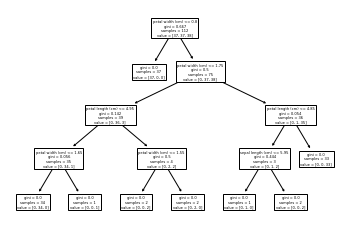

In [4]:
tree.plot_tree(T, feature_names=iris['feature_names'])

The tree is too small to read any of the labels. We can make the plot bigger by displaying it as a figure and setting the figure size.

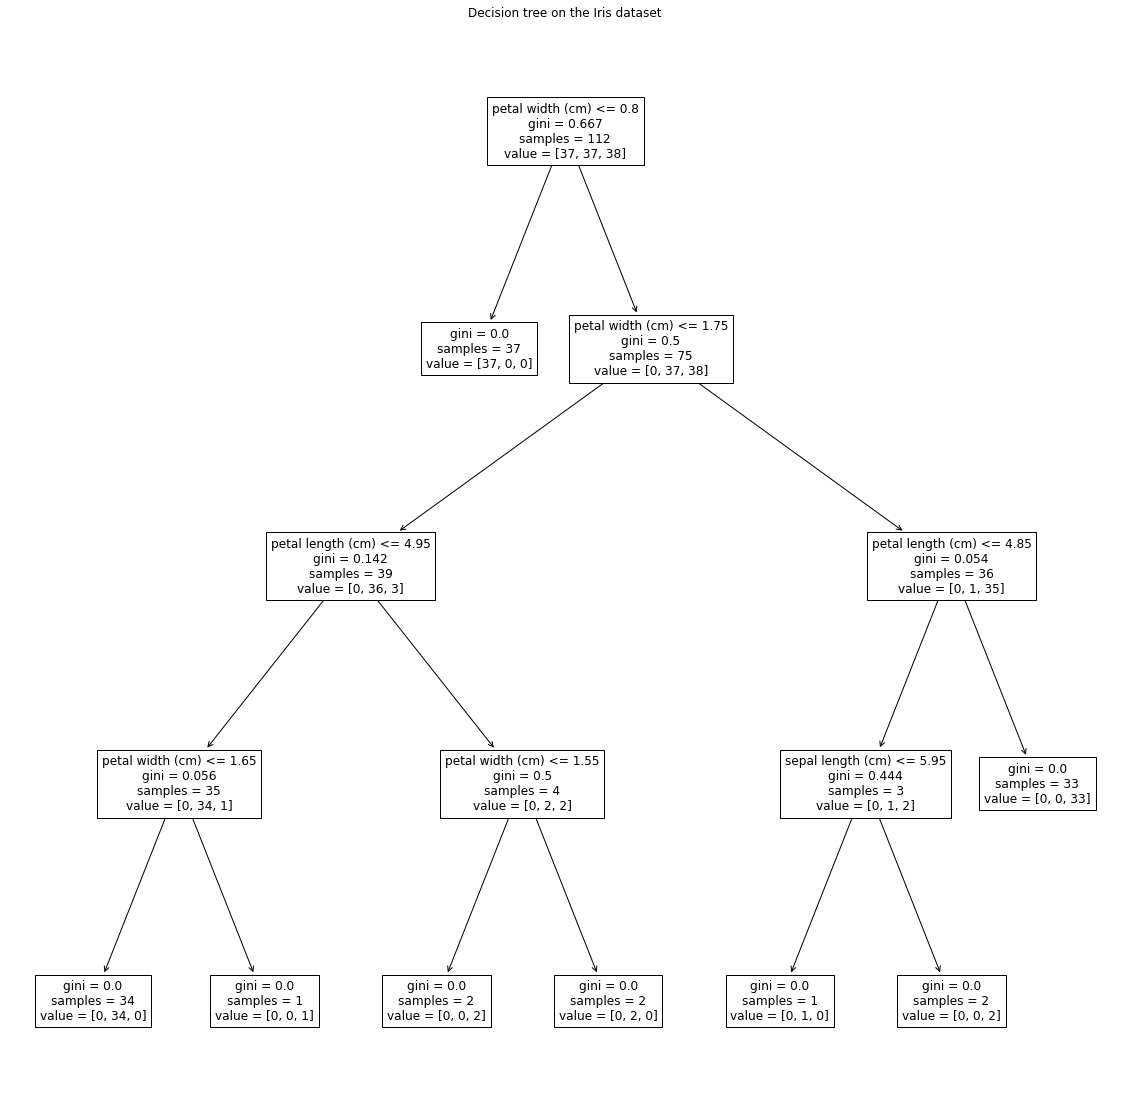

In [5]:
plt.figure(figsize=(20,20))
tree.plot_tree(T,feature_names=iris['feature_names'])
plt.title("Decision tree on the Iris dataset")
plt.show()

### Feature Importance
The decision tree tells us which features are the most important for determining the class of the sample. Each feature is given an importance value between 0 and 1. The importance values of all of the features add up to 1. We can view the feature importance values with the following code:

In [6]:
for i in range(0,4):
    print(iris.feature_names[i], ":", T.feature_importances_[i])

sepal length (cm) : 0.017858566531132904
sepal width (cm) : 0.0
petal length (cm) : 0.029556581768971135
petal width (cm) : 0.952584851699896


Introduction to Machine Learning with Python [1] gives code on pages 79 and 80 that produces a nice barplot of the importance values of features:

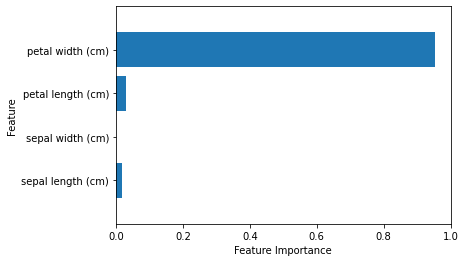

In [7]:
def plot_feature_importances(model):
    n_features = iris.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(T)

## Use the decision tree to predict classes of test samples
We can predict the classes of the test samples in x_tst using the T.predict() function.

In [8]:
T.predict(x_tst)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

Lets view the class predictions of the test samples in a confusion matrix.

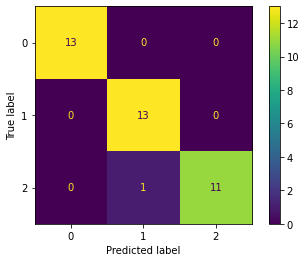

In [9]:
metrics.plot_confusion_matrix(T, x_tst, y_tst)

One metric for evaluating the predictions is accuracy. Accuracy is the ratio of the number of correct predictions to the total number of predictions. An accuracy of 1 means that every single prediction that the tree made is correct. 

We can calculate the accuracy of our decision tree on our test set by hand from the confusion matrix. Our tree correctly predicted the classes of $13 + 13 + 11 = 37$ test samples, but made a total of $13 + 13 + 11 + 1 = 38$ predictions. Thus the accuracy is $37/38$. 

In [10]:
37/38

0.9736842105263158

A faster way to calucate the accuary is to use the score() function.

In [11]:
T.score(x_tst,y_tst)

0.9736842105263158

## Will we always get the same decision tree on the same training set?
Recall that when we fit our tree to our training set we set the random state parameter to 0. What happens if we train a new decision tree on our training set with radnom_state=1? 

In [12]:
T2 = tree.DecisionTreeClassifier(random_state=1)
T2 = T2.fit(x_trn, y_trn)

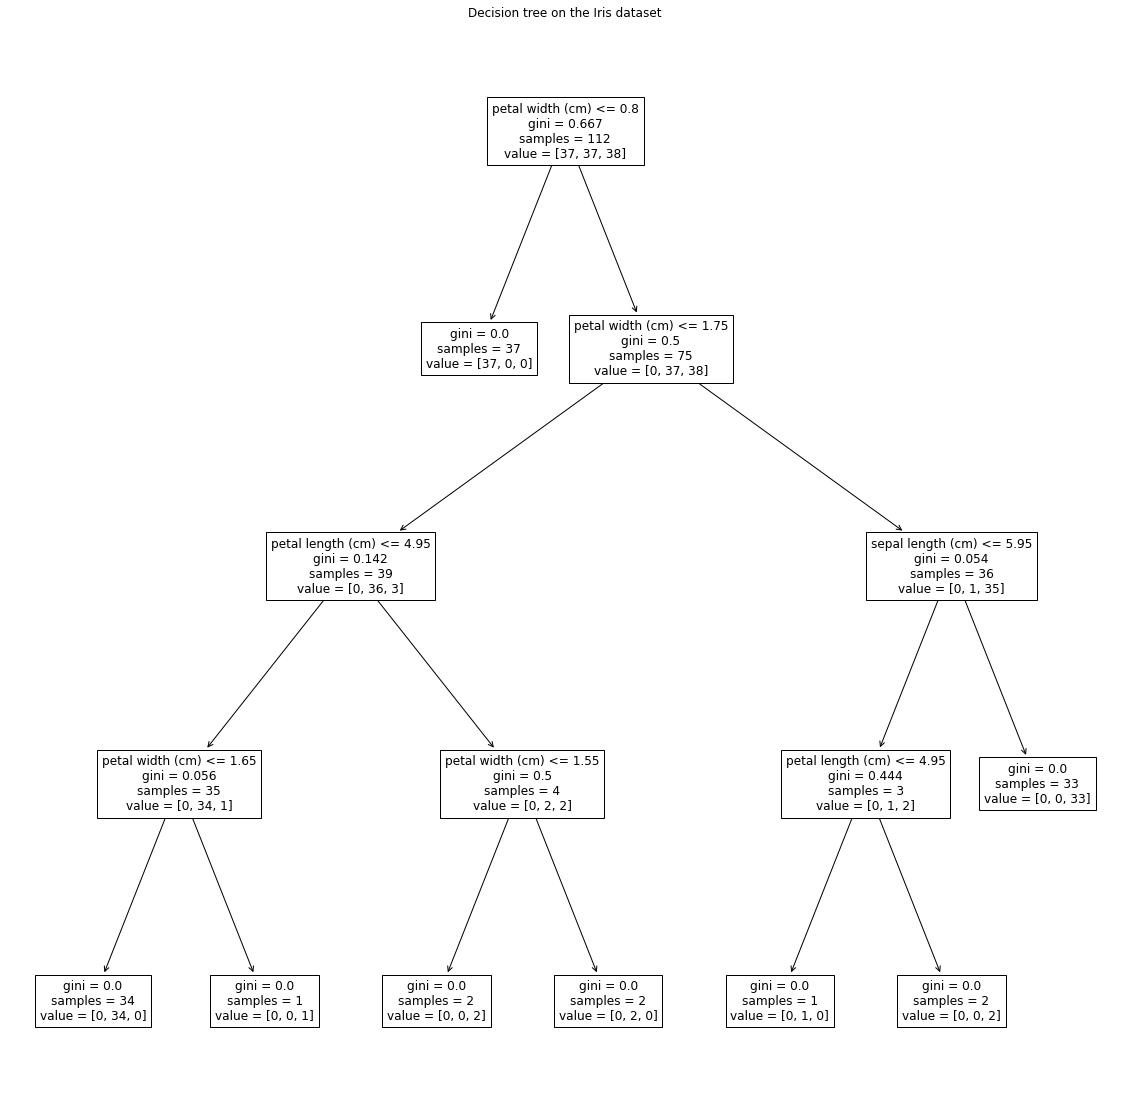

In [13]:
plt.figure(figsize=(20,20))
tree.plot_tree(T2,feature_names=iris['feature_names'])
plt.title("Decision tree on the Iris dataset")
plt.show()

Most of the nodes in the new tree are the same as in the old tree, but two of the nodes have changed. The old tree first checked whether the petal length was less than or equal to 4.85, then it checked whether the sepal length was less than or eqal to 5.95. The new tree checks whether the sepal length is less than or equal to 5.95 and then checks whether the petal length is less than 4.95.

The two trees are different, but does this change the accuracy of the predictions? The answer is yes. The new tree is less accurate than the old tree.

In [14]:
print("Accuracy of old tree on training set:", T.score(x_tst,y_tst))
print("Accuracy of new tree on training set:", T2.score(x_tst,y_tst))

Accuracy of old tree on training set: 0.9736842105263158
Accuracy of new tree on training set: 0.9473684210526315


If we look at the confusion matrices, we see that one additional test sample was misclassified by the new tree than by the old tree.

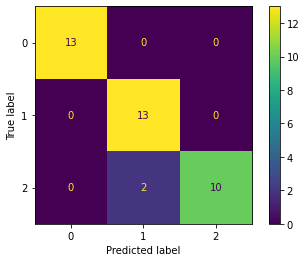

In [15]:
metrics.plot_confusion_matrix(T2, x_tst, y_tst)

At this point, you might be wondering why the function doesn't always give us the most accurate decision tree possible. It turns out that finding an optimal decision tree is an NP-complete problem [2]. This essentially means that finding the best possible decision tree can take a very very long time, so instead the function employs an algorithm that will produce a really good tree, but not necessarily the best possible tree.

## Improving the performance of the decision tree
In this tutorial we used the default settings when fitting a decision tree to our data. The Scikit-learn decision tree has a number of parameters that we can change and possibly improve the accuracy of the tree of the test set. For more information on these parameters, see [2].

## Some facts about decision trees
- Decision trees are a non-parametric supervised learning method
- The classes should be balanced in the training set otherwise the tree might be biased. "Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value." [2]
- Learning an optimal decision tree is NP-complete [2]
- Large feature sets often cause overfitting. PCA, ICA, or feature selection can be used to reduce large feature sets. [2]
- Scikit-learn uses an optimized version of the CART algorithm [2]
- For an explanation of the math behind decision trees see https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation.